In [210]:
import pandas as pd
import numpy as np

In [211]:
taxi_jan_2024 = pd.read_csv('data/yellow_tripdata_2024-01.csv')
taxi_data = pd.concat([taxi_jan_2024])

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/1023235160.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_jan_2024 = pd.read_csv('data/yellow_tripdata_2024-01.csv')


In [212]:
print(taxi_data.shape)
taxi_data.head

(2964624, 19)


<bound method NDFrame.head of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1               1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2               1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3               1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4               1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   
...           ...                  ...                   ...              ...   
2964619         2  2024-01-31 23:45:59   2024-01-31 23:54:36              NaN   
2964620         1  2024-01-31 23:13:07   2024-01-31 23:27:52              NaN   
2964621         2  2024-01-31 23:19:00   2024-01-31 23:38:00              NaN   
2964622         2  2024-01-31 23:07:23   2024-01-31 23:25:14              NaN   
2964623         1  2024-01-31 23:58:25   2024-02-01 00:13:30              NaN  

In [213]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [214]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 
       'PULocationID', 'DOLocationID', 'payment_type',
       'total_amount']]

In [215]:
taxi_data.head

<bound method NDFrame.head of         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0        2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1        2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2        2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3        2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4        2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   
...                      ...                   ...              ...   
2964619  2024-01-31 23:45:59   2024-01-31 23:54:36              NaN   
2964620  2024-01-31 23:13:07   2024-01-31 23:27:52              NaN   
2964621  2024-01-31 23:19:00   2024-01-31 23:38:00              NaN   
2964622  2024-01-31 23:07:23   2024-01-31 23:25:14              NaN   
2964623  2024-01-31 23:58:25   2024-02-01 00:13:30              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 1.72         1.0   

In [216]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

In [217]:
taxi_data['passenger_count'] = taxi_data['passenger_count'].fillna(0)
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype(int)

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/4196241516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['passenger_count'] = taxi_data['passenger_count'].fillna(0)
/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/4196241516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['passenger_count'] = taxi_data['passenger_count'].astype(int)


<Axes: xlabel='index', ylabel='total_amount'>

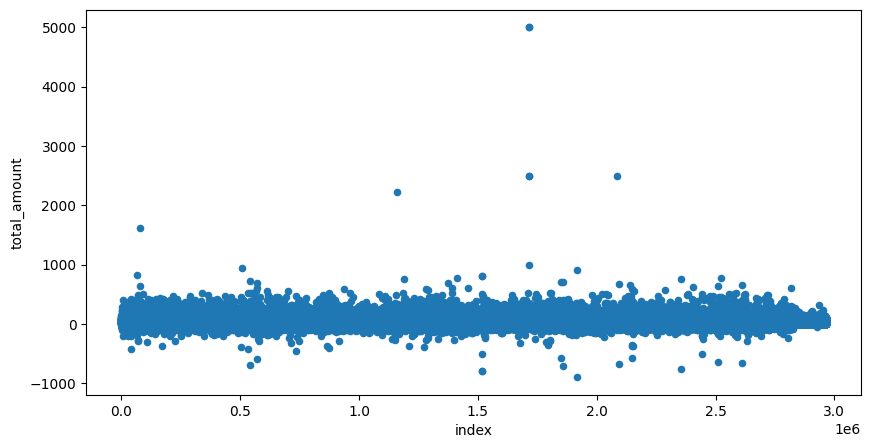

In [218]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [219]:
print(taxi_data[taxi_data['total_amount']<0].shape)

(35504, 9)


In [220]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1,8.74,1.0,90,225,4,-52.80


In [221]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

In [222]:
taxi_data = taxi_data[taxi_data['payment_type'] != 0]

In [223]:
taxi_data['payment_type'].value_counts()

payment_type
1    2319046
2     439191
4      46628
3      19597
Name: count, dtype: int64

In [224]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(405, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1,0.2,1.0,239,143,4,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1,0.0,5.0,239,264,2,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1,0.0,99.0,42,216,1,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1,0.0,1.0,264,264,2,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1,0.0,1.0,193,193,2,0.0


In [225]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
Name: count, dtype: int64

In [226]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     282
0.10      20
0.90       8
0.20       7
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
0.60       4
0.30       4
1.30       4
3.00       3
1.10       3
0.40       3
1.80       2
2.50       2
10.70      2
1.70       2
2.40       2
3.40       2
3.30       1
3.80       1
15.00      1
5.30       1
18.40      1
12.10      1
2.90       1
1.74       1
12.80      1
1.40       1
25.10      1
4.20       1
2.70       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
17.10      1
Name: count, dtype: int64

In [227]:
taxi_data['total_amount'].mean()

np.float64(26.850621339568377)

In [228]:
taxi_data['RatecodeID'] = taxi_data['RatecodeID'].astype(int)

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/2763619415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['RatecodeID'] = taxi_data['RatecodeID'].astype(int)


In [229]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]
taxi_data_filtered

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1,211,148,1,16.10
...,...,...,...,...,...,...,...,...,...
2824457,2024-01-31 23:10:28,2024-01-31 23:18:30,1,3.51,1,138,129,1,30.31
2824458,2024-01-31 23:01:04,2024-01-31 23:17:35,1,3.36,1,162,261,1,29.25
2824459,2024-01-31 23:08:13,2024-01-31 23:25:00,3,3.30,1,43,249,1,23.70
2824460,2024-01-31 23:49:46,2024-01-31 23:53:10,0,0.40,1,142,163,2,10.10


In [230]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [231]:
taxi_data_prepared = taxi_data_filtered.copy()

In [232]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [233]:
taxi_data_prepared['tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'], errors='coerce')
taxi_data_prepared['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared['tpep_dropoff_datetime'], errors='coerce')

In [234]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/2964672392.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/2964672392.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['186' '140' '236' ... '43' '142' '140']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/2964672392.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a futu

In [235]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [236]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [237]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1,211,148,1,16.10,2024-01-01,2024,1,1,0


In [238]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [239]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2786954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


In [240]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).agg(
    trip_distance=('trip_distance', 'mean'),
    total_amount=('total_amount', 'mean'), 
    count_of_transactions=('total_amount', 'count')
).reset_index()
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region

(71954, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2
...,...,...,...,...,...,...,...,...
71949,98,2024-01-30,1,30,5,14.600000,60.970000,2
71950,98,2024-01-31,1,31,5,12.500000,51.000000,1
71951,98,2024-01-31,1,31,10,17.100000,67.940000,1
71952,98,2024-01-31,1,31,12,0.600000,10.100000,1


<Axes: >

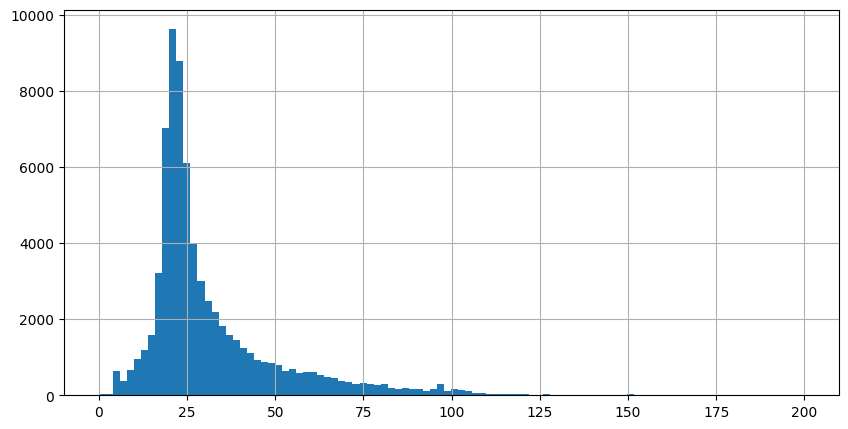

In [241]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

In [242]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [243]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

In [244]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

#one-hot-encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b= train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

In [245]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

In [246]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

print('Mean Absolute Error:', mean_absolute_error(y_test_b, y_pred_b))
print('Mean Squared Error:', mean_squared_error(y_test_b, y_pred_b))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('R2 Score:', r2_score(y_test_b, y_pred_b))

Mean Absolute Error: 6.2970612923191585
Mean Squared Error: 153.54945130834486
Root Mean Squared Error: 12.391507225045098
R2 Score: 0.6165171535646234


<Axes: xlabel='true', ylabel='predicted'>

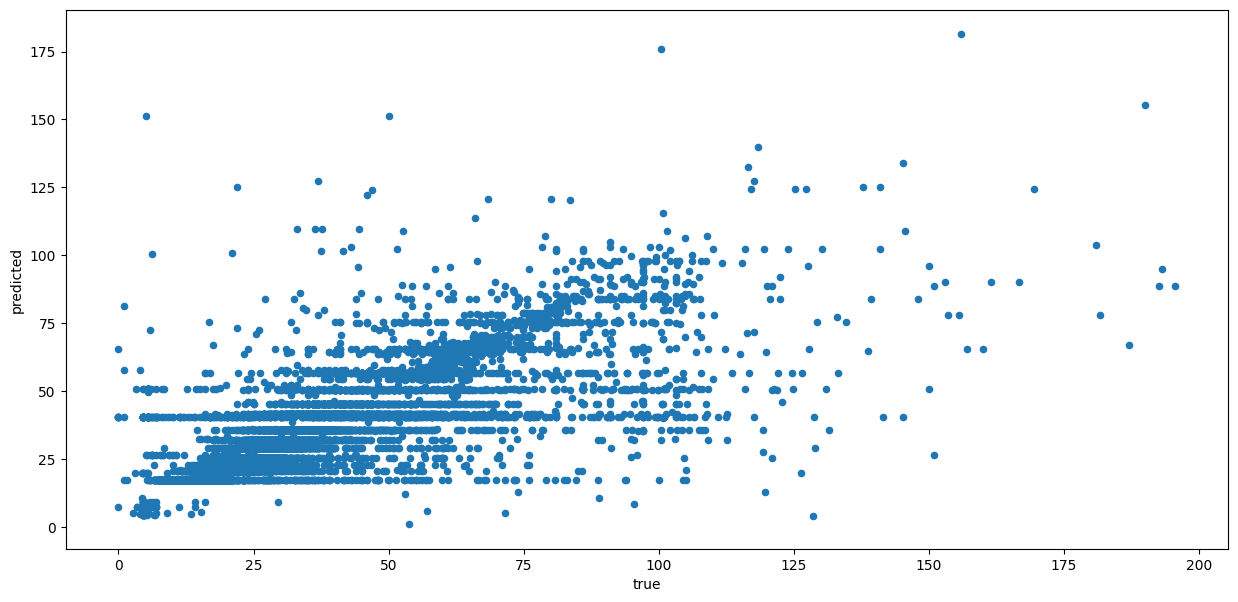

In [247]:
data = {'true': y_test_b, 'predicted': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(15,7), kind='scatter', x='true', y='predicted')

In [248]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark = categorical_features_benchmark 
target_feature_benchmark = 'total_amount'

In [249]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

#one-hot-encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b= train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

In [250]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

In [251]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

print('Mean Absolute Error:', mean_absolute_error(y_test_b, y_pred_b))
print('Mean Squared Error:', mean_squared_error(y_test_b, y_pred_b))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('R2 Score:', r2_score(y_test_b, y_pred_b))

Mean Absolute Error: 11.544195836328196
Mean Squared Error: 300.18221760358387
Root Mean Squared Error: 17.32576744630909
R2 Score: 0.2503084167670364


In [252]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


In [253]:
data_with_new_features = taxi_grouped_by_region.copy()

In [254]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x in [5,6] else False)

In [255]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2024-01-01', end='2024-01-31').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/3638030593.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)


In [256]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True


In [257]:
import datetime

weekend_days = data_with_new_features[data_with_new_features['weekend']]['transaction_date'].dt.date
print(weekend_days)


38       2024-01-06
39       2024-01-06
40       2024-01-06
41       2024-01-06
42       2024-01-06
            ...    
71931    2024-01-20
71932    2024-01-20
71933    2024-01-21
71945    2024-01-27
71946    2024-01-27
Name: transaction_date, Length: 17307, dtype: object


In [258]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [259]:
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [260]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True,1,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True,1,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True,1,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True,1,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True,1,EWR


In [261]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        41388
Queens           13456
Brooklyn         11117
Bronx             4530
Unknown            721
EWR                179
Staten Island       45
Name: count, dtype: int64

In [262]:
nyc_weather = pd.read_csv('data/nyc_january_weather.csv')
nyc_weather

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York City,USA",2024-01-01T00:00:00,43.2,38.9,27.1,52.85,0.0,0,NaN,0.0,...,1015.9,97.3,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
1,"New York City,USA",2024-01-01T01:00:00,42.4,37.9,27.3,54.91,0.0,0,NaN,0.0,...,1015.8,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
2,"New York City,USA",2024-01-01T02:00:00,42.4,38.4,28.0,56.54,0.0,0,NaN,0.0,...,1015.6,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
3,"New York City,USA",2024-01-01T03:00:00,41.4,39.8,28.4,59.58,0.0,0,NaN,0.0,...,1015.6,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
4,"New York City,USA",2024-01-01T04:00:00,41.4,38.8,29.2,61.45,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,"New York City,USA",2024-01-31T19:00:00,39.1,35.7,29.1,67.20,0.0,0,NaN,0.0,...,1018.9,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
740,"New York City,USA",2024-01-31T20:00:00,39.1,39.1,29.3,67.61,0.0,0,NaN,0.0,...,1018.6,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
741,"New York City,USA",2024-01-31T21:00:00,38.4,38.4,29.5,70.00,0.0,0,NaN,0.0,...,1018.5,98.2,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."
742,"New York City,USA",2024-01-31T22:00:00,38.9,36.2,30.3,70.81,0.0,0,NaN,0.0,...,1018.4,95.7,9.9,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7..."


In [263]:
nyc_weather = nyc_weather[['datetime','temp','humidity','windspeed','cloudcover','precip']]
nyc_weather.head()

,datetime,temp,humidity,windspeed,cloudcover,precip
0,2024-01-01T00:00:00,43.2,52.85,7.1,97.3,0.0
1,2024-01-01T01:00:00,42.4,54.91,7.1,100.0,0.0
2,2024-01-01T02:00:00,42.4,56.54,6.2,100.0,0.0
3,2024-01-01T03:00:00,41.4,59.58,3.2,100.0,0.0
4,2024-01-01T04:00:00,41.4,61.45,4.2,100.0,0.0


In [264]:
nyc_weather.dtypes
nyc_weather['datetime'] = pd.to_datetime(nyc_weather['datetime'])

/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/1981913797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_weather['datetime'] = pd.to_datetime(nyc_weather['datetime'])


In [265]:
nyc_weather['cloudcover'].value_counts()

cloudcover
100.0    303
10.5      59
0.0       54
95.7      52
34.2      27
        ... 
44.6       1
41.3       1
8.0        1
19.7       1
98.1       1
Name: count, Length: 69, dtype: int64

In [266]:
nyc_weather['precip'].value_counts()

precip
0.000    608
0.003      9
0.012      8
0.011      8
0.007      7
        ... 
0.186      1
0.288      1
0.046      1
0.067      1
0.066      1
Name: count, Length: 64, dtype: int64

In [267]:
nyc_weather.isna().sum()

datetime      0
temp          0
humidity      0
windspeed     0
cloudcover    0
precip        0
dtype: int64

In [268]:
nyc_weather.loc[:,'datetime'] = pd.to_datetime(nyc_weather.loc[:,'datetime'])
nyc_weather['hour'] = nyc_weather['datetime'].dt.hour
nyc_weather['month'] = nyc_weather['datetime'].dt.month
nyc_weather['day'] = nyc_weather['datetime'].dt.day


/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/77697253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_weather['hour'] = nyc_weather['datetime'].dt.hour
/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/77697253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_weather['month'] = nyc_weather['datetime'].dt.month
/var/folders/p3/5v5_pxbd3_787n9jly7_jq180000gn/T/ipykernel_16482/77697253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [269]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on=['transaction_month','transaction_day','transaction_hour'], right_on=['month','day','hour'], how='left')
print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather

(71954, 22)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,datetime,temp,humidity,windspeed,cloudcover,precip,hour,month,day
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,...,EWR,2024-01-01 05:00:00,40.5,65.08,1.1,93.1,0.0,5.0,1.0,1.0
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,...,EWR,2024-01-01 06:00:00,41.3,64.70,5.6,100.0,0.0,6.0,1.0,1.0
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,...,EWR,2024-01-01 13:00:00,46.2,57.35,3.4,88.9,0.0,13.0,1.0,1.0
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,...,EWR,2024-01-01 14:00:00,45.3,54.66,2.7,88.9,0.0,14.0,1.0,1.0
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,...,EWR,2024-01-01 15:00:00,46.0,53.21,4.0,95.7,0.0,15.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71949,98,2024-01-30,1,30,5,14.600000,60.970000,2,1,False,...,Queens,2024-01-30 05:00:00,35.1,61.52,5.9,100.0,0.0,5.0,1.0,30.0
71950,98,2024-01-31,1,31,5,12.500000,51.000000,1,2,False,...,Queens,2024-01-31 05:00:00,35.0,79.53,5.6,100.0,0.0,5.0,1.0,31.0
71951,98,2024-01-31,1,31,10,17.100000,67.940000,1,2,False,...,Queens,2024-01-31 10:00:00,37.3,66.79,4.6,100.0,0.0,10.0,1.0,31.0
71952,98,2024-01-31,1,31,12,0.600000,10.100000,1,2,False,...,Queens,2024-01-31 12:00:00,38.3,65.62,6.9,100.0,0.0,12.0,1.0,31.0


In [270]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['datetime','hour','month','day'], axis=1)

In [271]:
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
LocationID                 0
Borough                  518
temp                      14
humidity                  14
windspeed                 14
cloudcover                14
precip                    14
dtype: int64

In [272]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
LocationID                 0
Borough                  518
temp                      14
humidity                  14
windspeed                 14
cloudcover                14
precip                    14
dtype: int64

In [277]:
nyc_taxi_with_weather.transaction_date.value_counts()
nyc_taxi_with_weather = nyc_taxi_with_weather[nyc_taxi_with_weather['transaction_date'].dt.month == 1]
nyc_taxi_with_weather['transaction_date'].dt.month.value_counts()

transaction_date
1    71940
Name: count, dtype: int64

In [278]:
nyc_taxi_with_weather.dtypes

PULocationID                     object
transaction_date         datetime64[ns]
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
trip_distance                   float64
total_amount                    float64
count_of_transactions             int64
transaction_week_day              int32
weekend                            bool
is_holiday                         bool
LocationID                       object
Borough                          object
temp                            float64
humidity                        float64
windspeed                       float64
cloudcover                      float64
precip                          float64
dtype: object

In [275]:
data_for_model = nyc_taxi_with_weather.copy()

In [279]:
categorical_features = ['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_week_day','weekend','is_holiday','Borough']
input_features = categorical_features + ['temp','humidity','windspeed','cloudcover','precip']
target_feature = 'total_amount'

In [280]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

#one-hot-encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [281]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [282]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 9.89586477875692
Mean Squared Error: 267.7658617210981
Root Mean Squared Error: 16.363552845305268
R2 Score: 0.33126680716802004


<Axes: xlabel='true', ylabel='predicted'>

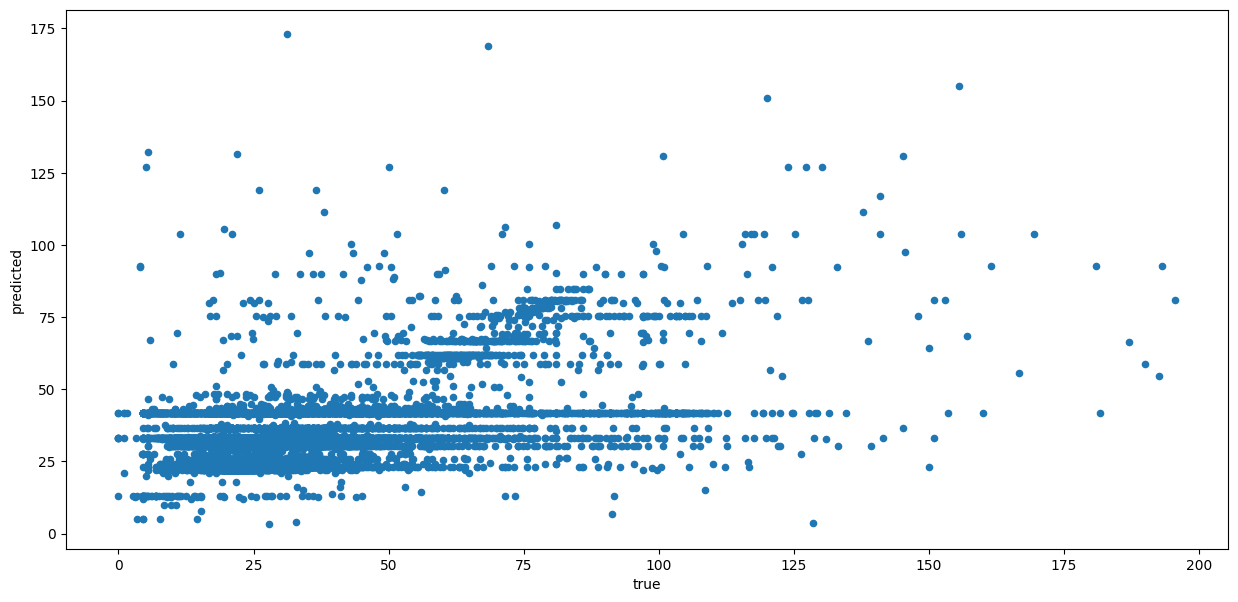

In [283]:
data = {'true': y_test, 'predicted': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(15,7), kind='scatter', x='true', y='predicted')

In [284]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [289]:
rmse_scores = {'max_depth': [], 'rmse_train': [], 'rmse_test': []}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print('Max Depth:', md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    y_pred_train = decision_tree_overfit.predict(X_train_overfit)
    y_pred_test = decision_tree_overfit.predict(X_test_overfit)
    
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

print(rmse_scores)

Max Depth: 2
Max Depth: 5
Max Depth: 8
Max Depth: 10
Max Depth: 15
Max Depth: 20
Max Depth: 30
Max Depth: 50
Max Depth: 70
Max Depth: 100
Max Depth: 150
{'max_depth': [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150], 'rmse_train': [18.058681137675418, 16.70727852340456, 15.9726342070742, 15.42772801529425, 13.953452569892624, 12.357663113044634, 9.748845093515698, 4.650541506096196, 0.848952190627863, 3.9871034259960864e-17, 4.0042523370765167e-17], 'rmse_test': [18.006276872284744, 16.91073167619415, 16.528896956414965, 16.38687856509091, 16.50121188137145, 17.467132379830986, 18.72068836312746, 19.96123042092933, 20.401294492725143, 20.655506227490925, 20.580219681837885]}


Text(0, 0.5, 'rmse')

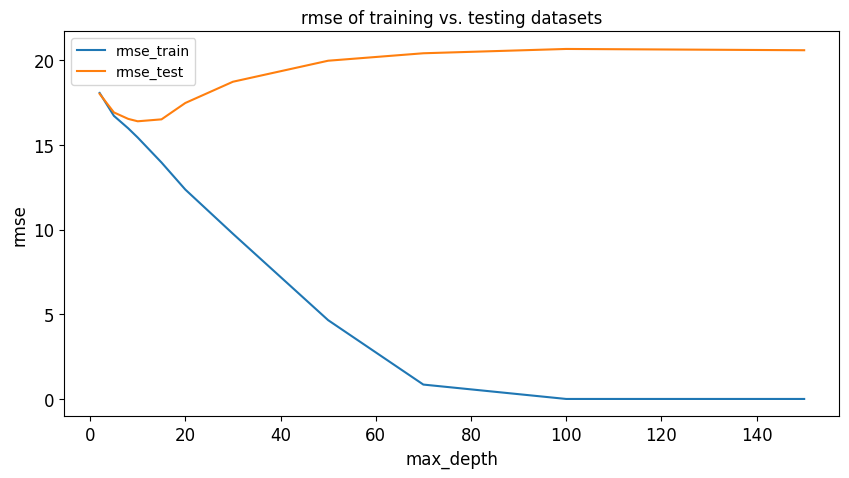

In [291]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5), title='rmse of training vs. testing datasets', fontsize=12, x='max_depth')
ax.set_xlabel("max_depth", fontsize=12)
ax.set_ylabel("rmse", fontsize=12)

In [294]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)

RandomForestRegressor()

In [295]:
model_at_hand = random_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 9.005804640255485
Mean Squared Error: 240.55961323247135
Root Mean Squared Error: 15.509984307937625
R2 Score: 0.39921318875616274


<Axes: xlabel='true', ylabel='predicted'>

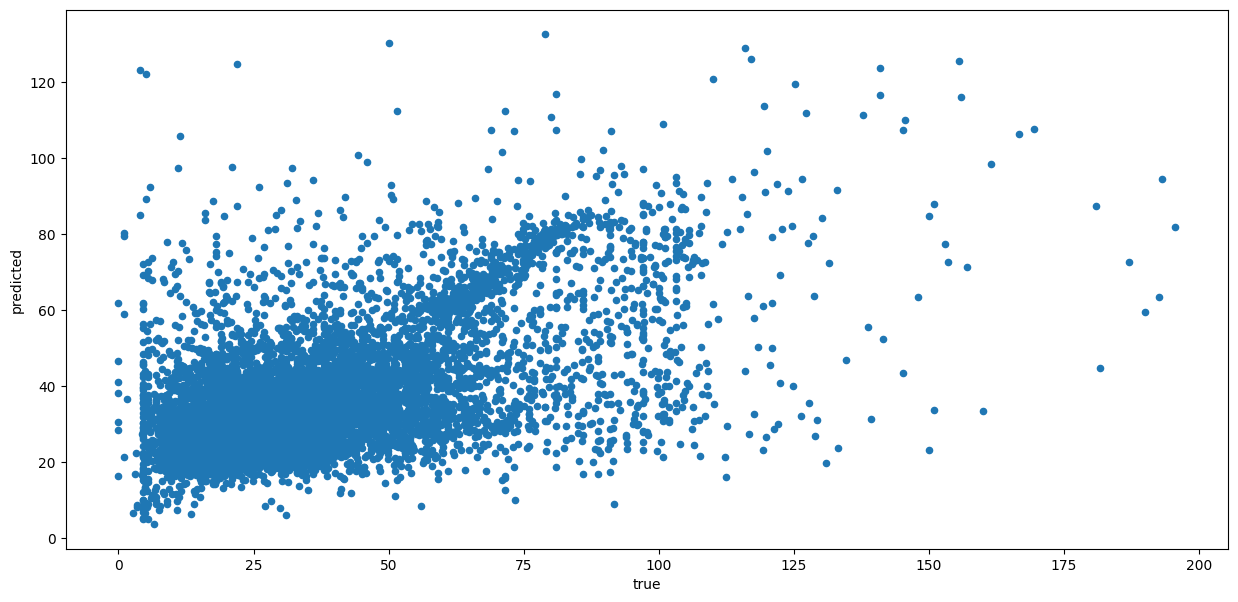

In [296]:
data = {'true': y_test, 'predicted': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(15,7), kind='scatter', x='true', y='predicted')

In [304]:
from sklearn.ensemble import HistGradientBoostingRegressor
gradBooster = HistGradientBoostingRegressor(random_state=0)
gradBooster.fit(X_train, y_train)


HistGradientBoostingRegressor(random_state=0)

In [305]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 9.08685122234999
Mean Squared Error: 226.71378037160994
Root Mean Squared Error: 15.057017645324386
R2 Score: 0.43379253340057455


In [308]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [10,20,50,100,150,200,300,500]  
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 40]
min_samples_leaf = [1, 2, 4, 10, 20]
bootstrap = [True, False]

In [309]:
import pprint as pp

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [319]:
import time

t0 = time.time()

best = RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=150,bootstrap=True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, "seconds")

model_at_hand = best

y_bench = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Time elapsed:  19.609296083450317 seconds
Mean Absolute Error: 9.08685122234999
Mean Squared Error: 226.71378037160994
Root Mean Squared Error: 15.057017645324386
R2 Score: 0.43379253340057455


<Axes: >

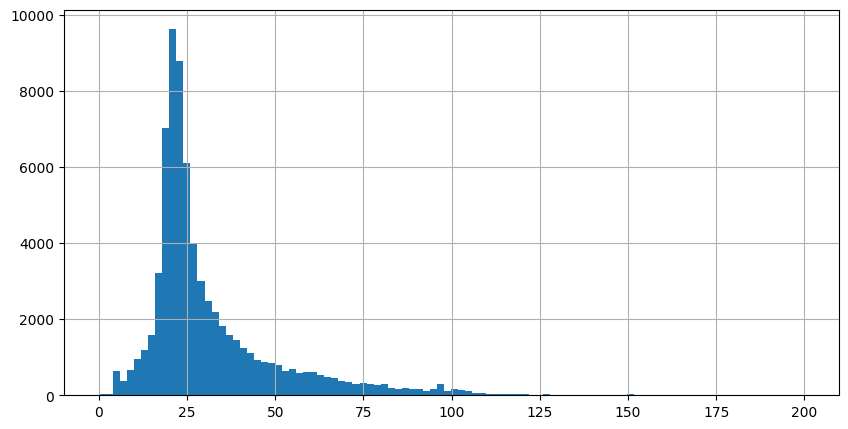

In [320]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [321]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough,temp,humidity,windspeed,cloudcover,precip,earning_class,earning_class_binary
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,True,1,EWR,40.5,65.08,1.1,93.1,0.0,high,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,True,1,EWR,41.3,64.70,5.6,100.0,0.0,high,1
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,True,1,EWR,46.2,57.35,3.4,88.9,0.0,high,1
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,True,1,EWR,45.3,54.66,2.7,88.9,0.0,high,1
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,True,1,EWR,46.0,53.21,4.0,95.7,0.0,high,1


In [322]:
nyc_class['earning_class'].value_counts()

earning_class
high    67272
low      4668
Name: count, dtype: int64

In [325]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temp', 'humidity', 'windspeed', 'cloudcover',
       'precip']
target_feature = 'earning_class_binary'

In [326]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [327]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [328]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[  176  1365]
 [  173 22027]]
accuracy 0.9352175561265321
precision 0.9416467168262654
recall 0.9922072072072072
